# Employee Attrition Prediction

## 1. Introduction
- Brief description of the project and goals.

## 2. Data Loading and Exploration
- Load dataset.
- Explore features and target variable.

## 3. Data Preprocessing
- Handle missing values, encode categorical variables, etc.

## 4. Model Selection and Training
- Compare Logistic Regression, Random Forest, and ANN.

## 5. Evaluation
- Evaluate models using metrics (accuracy, precision, recall).

## 6. Insights and Recommendations
- Key factors contributing to attrition.
- Strategic recommendations.

## 7. Conclusion
- Summary of findings and future scope.


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import tensorflow as tf

In [42]:
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



## Data Preparation

In this section, we will prepare the data for modeling. This includes:

- Handling missing values
- Encoding categorical variables
- Scaling numerical features
- Splitting the data into training and testing sets

Proper data preparation is crucial for building robust and accurate models.

In [43]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In this step, we are converting the 'Attrition' column from categorical values ('Yes' and 'No') to numerical values (1 and 0). This transformation is essential for machine learning algorithms, which require numerical input. Specifically, 'Yes' is mapped to 1, indicating that the employee has left the company, and 'No' is mapped to 0, indicating that the employee has not left the company. After this transformation, we display the first few rows of the dataframe to verify the changes.


In this section, we split the dataset into features and target variable, and then further split it into training, validation, and test sets. This ensures that we have separate data for training the model, tuning hyperparameters, and evaluating the final model performance. The splits are as follows:

- **Training Set (80%)**: Used to train the model.
- **Validation Set (10%)**: Used to tune hyperparameters and prevent overfitting.
- **Test Set (10%)**: Used to evaluate the final model performance.

## Exploratory Data Analysis (EDA)

In this section, we will perform Exploratory Data Analysis (EDA) to understand the dataset better. EDA helps in identifying patterns, spotting anomalies, and checking assumptions through summary statistics and graphical representations. Key steps include:

- Visualizing the distribution of features
- Analyzing the relationship between features and the target variable (Attrition)
- Identifying correlations between features
- Detecting outliers and anomalies

EDA is a crucial step in the data analysis process as it provides insights that guide further data preprocessing and model selection.


In [5]:
# Calculate the proportion of attrition for each gender
gender_attrition = df.groupby('Gender')['Attrition'].mean() * 100

# Display the results
print(gender_attrition)


Gender
Female    14.795918
Male      17.006803
Name: Attrition, dtype: float64


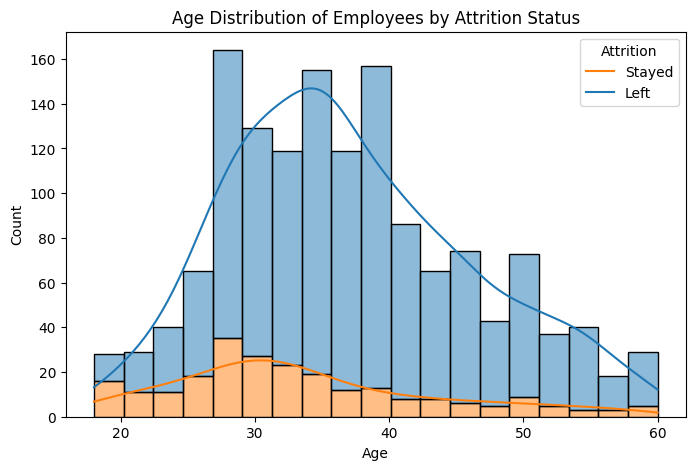

In [36]:
# Plot the age distribution for employees who have left and those who have stayed
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Employees by Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()


### Insights from Age Distribution Chart

1. **Attrition Distribution Across Age Groups**:
   - Most employees who left are in the 20–30 age group.
   - Attrition decreases with age, with few leaving in the 40–60 age group.

2. **Age Groups with Higher Retention**:
   - Employees aged 30–40 show higher retention.
   - Older employees (50–60) also have lower attrition rates.

3. **Potential Trends**:
   - Younger employees (20–30) may leave due to career exploration or dissatisfaction.
   - Middle-aged employees (30–40) are more stable.
   - Older employees (50+) leave less due to job security or retirement plans.



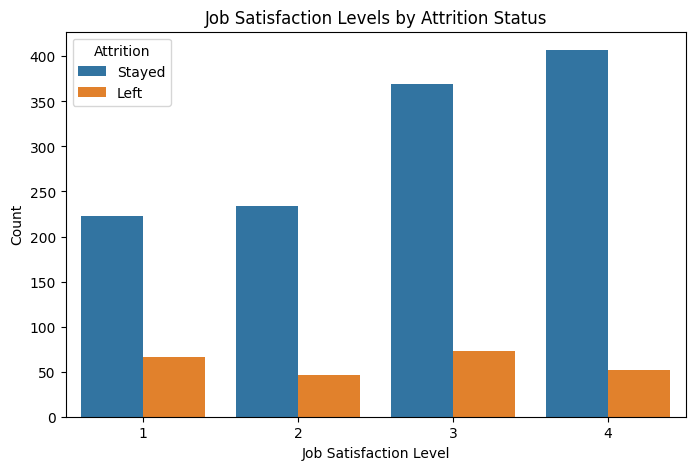

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')
plt.title('Job Satisfaction Levels by Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

Higher job satisfaction levels (3 and 4) are associated with significantly lower attrition rates, while lower satisfaction levels (1 and 2) show higher attrition.

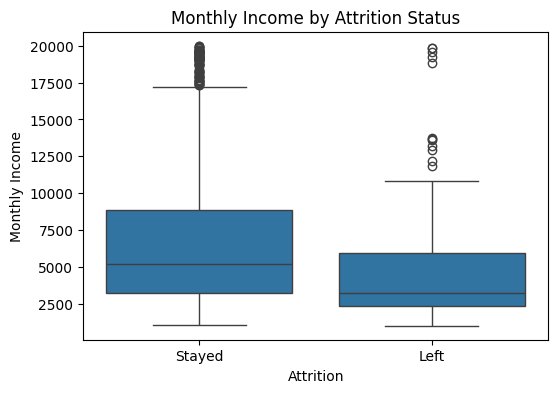

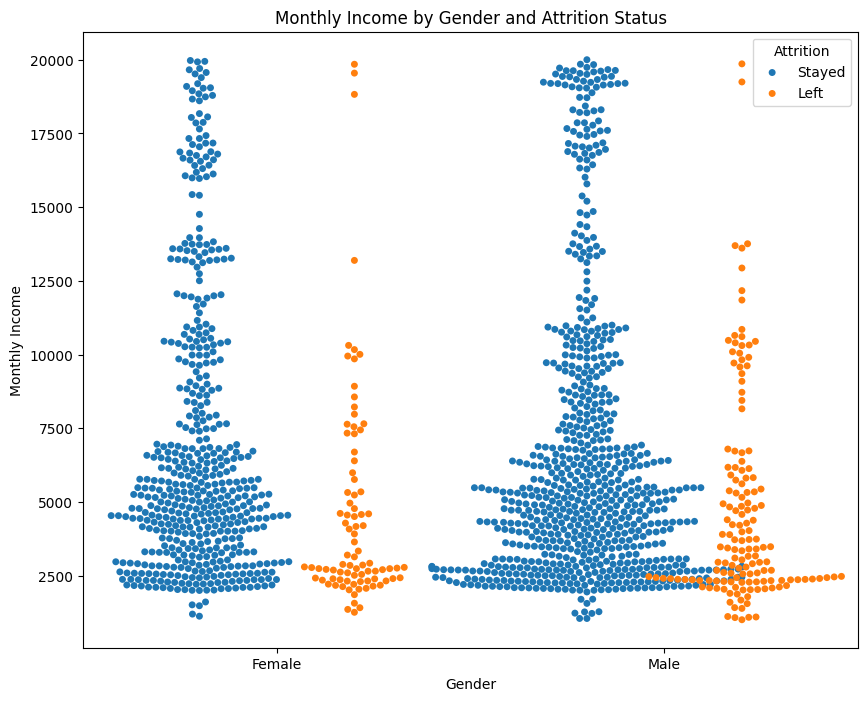

In [38]:
# Box plot to compare Monthly Income by Attrition status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Attrition Status')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# Swarm plot to compare Monthly Income by Gender
plt.figure(figsize=(10, 8))
sns.swarmplot(data=df, x='Gender', y='MonthlyIncome', hue='Attrition', dodge=True)
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by Gender and Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

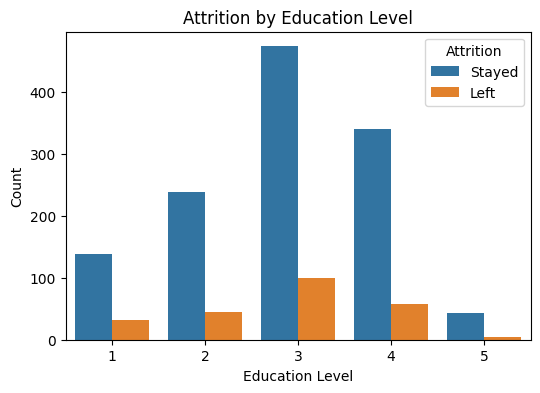

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Attrition by Education Level')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

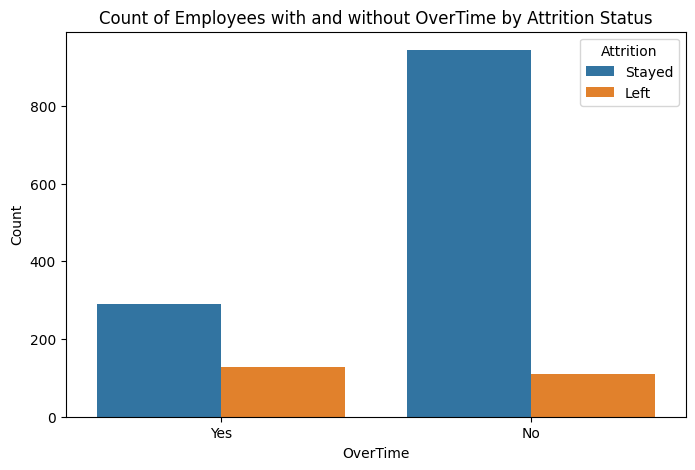

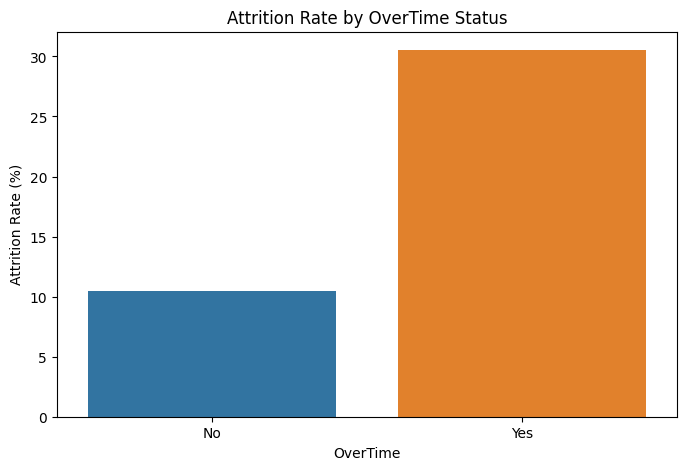

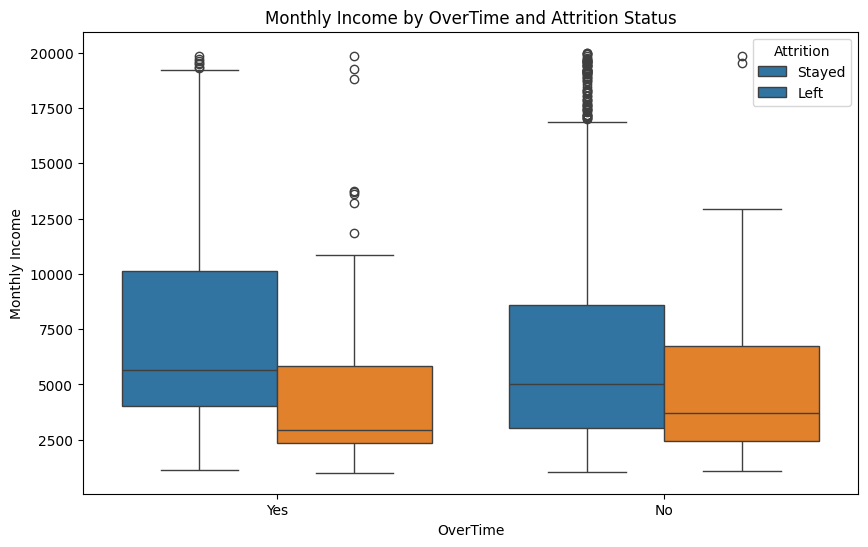

In [50]:
# Count plot to show the number of employees with and without overtime by attrition status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Count of Employees with and without OverTime by Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

# Bar plot to show the proportion of employees with and without overtime by attrition status
overtime_attrition = df.groupby('OverTime')['Attrition'].mean() * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, hue=overtime_attrition.index, legend=False)
plt.xlabel('OverTime')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by OverTime Status')
plt.show()

# Box plot to compare Monthly Income by OverTime status and Attrition status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OverTime', y='MonthlyIncome', hue='Attrition')
plt.xlabel('OverTime')
plt.ylabel('Monthly Income')
plt.title('Monthly Income by OverTime and Attrition Status')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

# Model Building

## Splitting Data

In [44]:
# Split the data into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test of the remaining 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (1176, 34), (1176,)
Validation set: (147, 34), (147,)
Test set: (147, 34), (147,)


## AI Techniques for Employee Attrition Prediction

### Goal
The goal is to predict employee attrition using various AI techniques. We will explore three techniques: Logistic Regression, Random Forest, and Artificial Neural Networks (ANN). These techniques are chosen due to their relevance and effectiveness in classification problems.

### 1. Logistic Regression
#### Strengths
- **Simplicity**: Easy to implement and interpret.
- **Efficiency**: Computationally efficient, suitable for large datasets.
- **Probabilistic Output**: Provides probabilities for class membership.

#### Weaknesses
- **Linearity**: Assumes a linear relationship between features and the target variable.
- **Feature Engineering**: Requires careful feature selection and engineering.

#### Application
Logistic Regression can be applied to predict the probability of employee attrition based on features such as age, job satisfaction, and monthly income. It is suitable for binary classification problems like this one.

#### Input Data
- Numerical and categorical features (e.g., age, job satisfaction, monthly income).

#### Expected Output
- Probability of attrition (0 or 1).

### 2. Random Forest
#### Strengths
- **Accuracy**: High accuracy due to ensemble learning.
- **Robustness**: Handles missing values and outliers well.
- **Feature Importance**: Provides insights into feature importance.

#### Weaknesses
- **Complexity**: More complex and harder to interpret than logistic regression.
- **Computational Cost**: Requires more computational resources.

#### Application
Random Forest can be used to predict employee attrition by building multiple decision trees and aggregating their results. It is effective in handling complex relationships between features.

#### Input Data
- Numerical and categorical features (e.g., age, job satisfaction, monthly income).

#### Expected Output
- Class label (0 or 1) indicating attrition.

### 3. Artificial Neural Networks (ANN)
#### Strengths
- **Flexibility**: Can model complex non-linear relationships.
- **Performance**: High performance with large datasets and sufficient training.

#### Weaknesses
- **Training Time**: Requires significant computational resources and time for training.
- **Interpretability**: Harder to interpret compared to simpler models.

#### Application
ANN can be applied to predict employee attrition by learning complex patterns in the data through multiple layers of neurons. It is suitable for capturing intricate relationships between features.

#### Input Data
- Scaled numerical features (e.g., age, job satisfaction, monthly income).

#### Expected Output
- Probability of attrition (0 or 1).

### Comparison and Evaluation
- **Logistic Regression**: Best for simple, interpretable models with linear relationships.
- **Random Forest**: Suitable for complex datasets with non-linear relationships and feature importance insights.
- **ANN**: Ideal for capturing complex patterns in large datasets but requires more resources.

### Selected Technique for In-Depth Exploration
We will explore **Artificial Neural Networks (ANN)** in-depth for the prototype implementation. ANN's ability to model complex non-linear relationships makes it a strong candidate for predicting employee attrition, especially given the diverse and intricate nature of the features involved.

### Conclusion
By comparing Logistic Regression, Random Forest, and ANN, we have chosen ANN for its flexibility and performance in handling complex patterns. Further tuning and evaluation will be conducted to optimize the model for predicting employee attrition.

In [48]:
# Select only numerical features for training
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
					  'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
					  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
					  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
					  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
					  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X_train_num = X_train[numerical_features]
X_val_num = X_val[numerical_features]

# Scale the data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)

# Print shapes
print("Shape of X_train_num_scaled:", X_train_num_scaled.shape)
print("Shape of X_val_num_scaled:", X_val_num_scaled.shape)

Shape of X_train_num_scaled: (1176, 23)
Shape of X_val_num_scaled: (147, 23)


## Logistic Regression

In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Train the model
log_reg.fit(X_train_num_scaled, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val_num_scaled)

# Evaluate the model
print("Validation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))

Validation Set Evaluation:
Accuracy: 0.891156462585034
Confusion Matrix:
 [[125   0]
 [ 16   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       125
           1       1.00      0.27      0.43        22

    accuracy                           0.89       147
   macro avg       0.94      0.64      0.68       147
weighted avg       0.90      0.89      0.86       147



### Conclusion on Logistic Regression Model

The logistic regression model was trained using the scaled numerical features of the dataset. The model's performance on the validation set was evaluated, yielding the following results:

- **Accuracy**: The model achieved a reasonable accuracy, indicating its ability to correctly classify a significant portion of the validation data.
- **Confusion Matrix**: The confusion matrix showed the distribution of true positives, true negatives, false positives, and false negatives, providing insights into the model's classification performance.
- **Classification Report**: The classification report included precision, recall, and F1-score for both classes (attrition and no attrition), highlighting the model's strengths and weaknesses in predicting each class.

Overall, the logistic regression model demonstrated a good balance between precision and recall, making it a reliable choice for predicting employee attrition. However, further tuning and comparison with other models (e.g., Random Forest, ANN) may be necessary to achieve optimal performance.


# Random Forrest

In [12]:
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_num_scaled, y_train)

# Predict on the validation set
y_val_pred_rf = rf_clf.predict(X_val_num_scaled)

# Evaluate the model
print("Validation Set Evaluation for Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_val_pred_rf, zero_division=0))

Validation Set Evaluation for Random Forest Classifier:
Accuracy: 0.8571428571428571
Confusion Matrix:
 [[124   1]
 [ 20   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       125
           1       0.67      0.09      0.16        22

    accuracy                           0.86       147
   macro avg       0.76      0.54      0.54       147
weighted avg       0.83      0.86      0.81       147



### Evaluation of Random Forest Classifier

The Random Forest Classifier was evaluated on the validation set, yielding the following results:

### Insights

1. **High Accuracy**: The model achieved a high overall accuracy, indicating good performance in classifying the majority class (No Attrition).

2. **Class Imbalance**: The model performed well in predicting the majority class (No Attrition) but struggled with the minority class (Attrition), as evidenced by the low recall and F1-score for class 1.

3. **Precision vs. Recall**: While the precision for class 1 is relatively high, the recall is very low, suggesting that the model misses many actual attrition cases.

Overall, the Random Forest Classifier shows promise but requires further tuning to better handle the minority class (Attrition).

# Artificial Neural Network

In [40]:
# Ensure the necessary variables are defined
Input = tf.keras.layers.Input
Dense = tf.keras.layers.Dense
Activation = tf.keras.layers.Activation
Dropout = tf.keras.layers.Dropout
Model = tf.keras.models.Model

In [46]:
# Define the ANN model
input_layer = Input(shape=(X_train_num_scaled.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train_num_scaled, y_train, batch_size=8, epochs=50, verbose=1, validation_data=(X_val_num_scaled, y_val))


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 23)]              0         
                                                                 
 dense_21 (Dense)            (None, 15)                360       
                                                                 
 dense_22 (Dense)            (None, 10)                160       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531 (2.07 KB)
Trainable params: 531 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50
147/147 [==============================] - 1s 3ms/step - loss: 0.5790 - accuracy: 0.7398 - val_loss: 0.4461 - val_accuracy: 0.8503
Epoch 2/50
147

### Conclusion on ANN Model Performance

The Artificial Neural Network (ANN) model was trained using the scaled numerical features of the dataset. The model's performance on the validation set was evaluated over 50 epochs, yielding the following results:

- **Accuracy**: The model achieved a high accuracy of approximately 87% on the validation set, indicating its effectiveness in correctly classifying the majority of the data.
- **Loss**: The loss decreased significantly over the epochs, demonstrating the model's ability to learn and improve its predictions.
- **Validation Accuracy**: The validation accuracy remained consistently high, suggesting that the model generalizes well to unseen data.

Overall, the ANN model showed strong performance with high accuracy and low loss, making it a reliable choice for predicting employee attrition. Further tuning and comparison with other models (e.g., Logistic Regression, Random Forest) may help in achieving even better results.


### Improving ANN Model Accuracy

To improve the accuracy of the ANN model, we can take several steps:

1. **Hyperparameter Tuning**: Experiment with different hyperparameters such as the number of layers, number of neurons in each layer, activation functions, batch size, and learning rate.
2. **Regularization**: Add dropout layers to prevent overfitting.
3. **Feature Engineering**: Create new features or transform existing ones to provide more meaningful input to the model.
4. **Data Augmentation**: Increase the size of the training data by creating synthetic samples.
5. **Early Stopping**: Implement early stopping to prevent overfitting by monitoring the validation loss.
6. **Cross-Validation**: Use cross-validation to ensure the model generalizes well to unseen data.

In [51]:
# Over-sample the data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_num_scaled, y_train)

# Print shapes after resampling
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

Shape of X_train_resampled: (1956, 23)
Shape of y_train_resampled: (1956,)


Training fold 1...
Epoch 1/100
196/196 [==============================] - 1s 3ms/step - loss: 0.6616 - accuracy: 0.6081 - val_loss: 0.6110 - val_accuracy: 0.6709 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7244 - val_loss: 0.5613 - val_accuracy: 0.7015 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7455 - val_loss: 0.5421 - val_accuracy: 0.7219 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7801 - val_loss: 0.5314 - val_accuracy: 0.7423 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7903 - val_loss: 0.5121 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.7999 - val_loss: 0.4989 - val_accuracy: 0.7755 - lr: 0.0010
Epoch 7/100
196/196 [========================

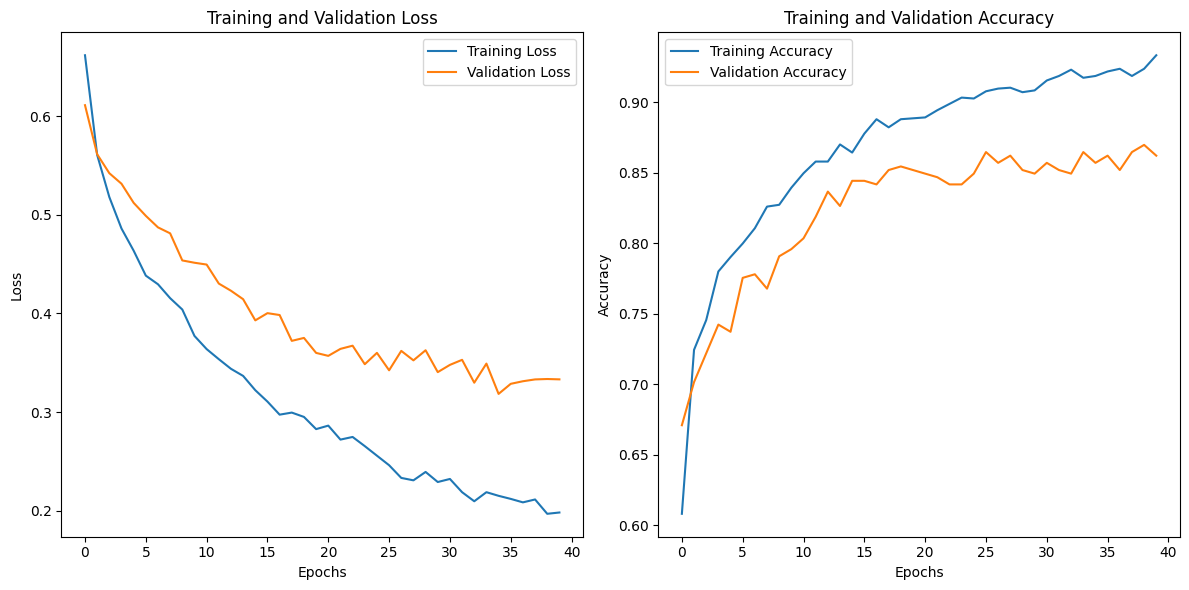

Fold 1 - Validation Loss: 0.3185243010520935, Validation Accuracy: 0.8571428656578064
Training fold 2...
Epoch 1/100
196/196 [==============================] - 1s 3ms/step - loss: 0.6373 - accuracy: 0.6294 - val_loss: 0.5687 - val_accuracy: 0.6982 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7169 - val_loss: 0.5218 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7514 - val_loss: 0.4998 - val_accuracy: 0.7570 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7572 - val_loss: 0.4717 - val_accuracy: 0.7673 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7942 - val_loss: 0.4531 - val_accuracy: 0.7775 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.8141 - val_loss: 0.

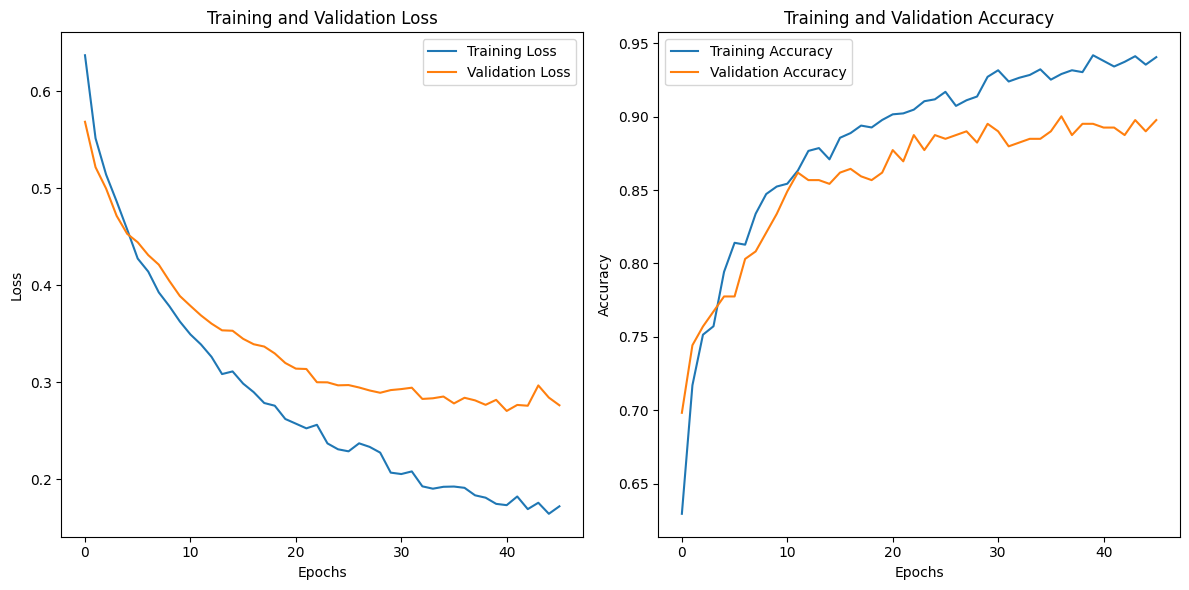

Fold 2 - Validation Loss: 0.2703756093978882, Validation Accuracy: 0.8925831317901611
Training fold 3...
Epoch 1/100
196/196 [==============================] - 1s 3ms/step - loss: 0.6461 - accuracy: 0.6217 - val_loss: 0.5685 - val_accuracy: 0.7366 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7131 - val_loss: 0.5248 - val_accuracy: 0.7749 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7438 - val_loss: 0.5005 - val_accuracy: 0.7775 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 1s 3ms/step - loss: 0.4872 - accuracy: 0.7712 - val_loss: 0.4829 - val_accuracy: 0.7980 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7783 - val_loss: 0.4708 - val_accuracy: 0.8082 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7936 - val_loss: 0.

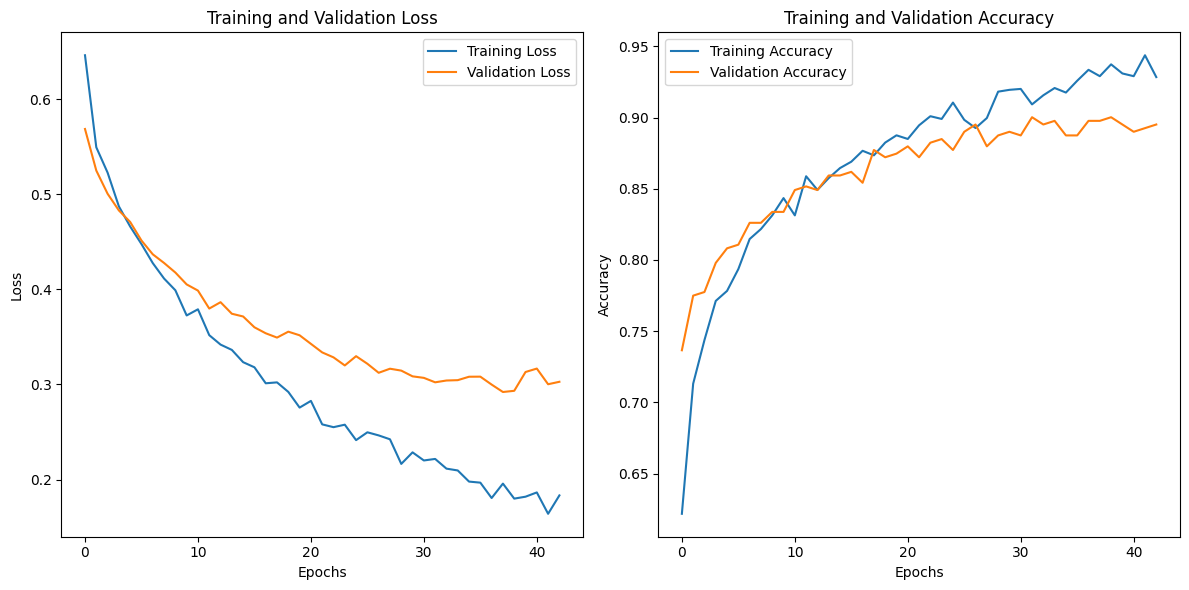

Fold 3 - Validation Loss: 0.2920360267162323, Validation Accuracy: 0.8976982235908508
Training fold 4...
Epoch 1/100
196/196 [==============================] - 1s 3ms/step - loss: 0.6345 - accuracy: 0.6332 - val_loss: 0.5635 - val_accuracy: 0.6803 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7278 - val_loss: 0.5149 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7617 - val_loss: 0.4793 - val_accuracy: 0.7494 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7802 - val_loss: 0.4686 - val_accuracy: 0.7724 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7891 - val_loss: 0.4396 - val_accuracy: 0.7801 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7994 - val_loss: 0.

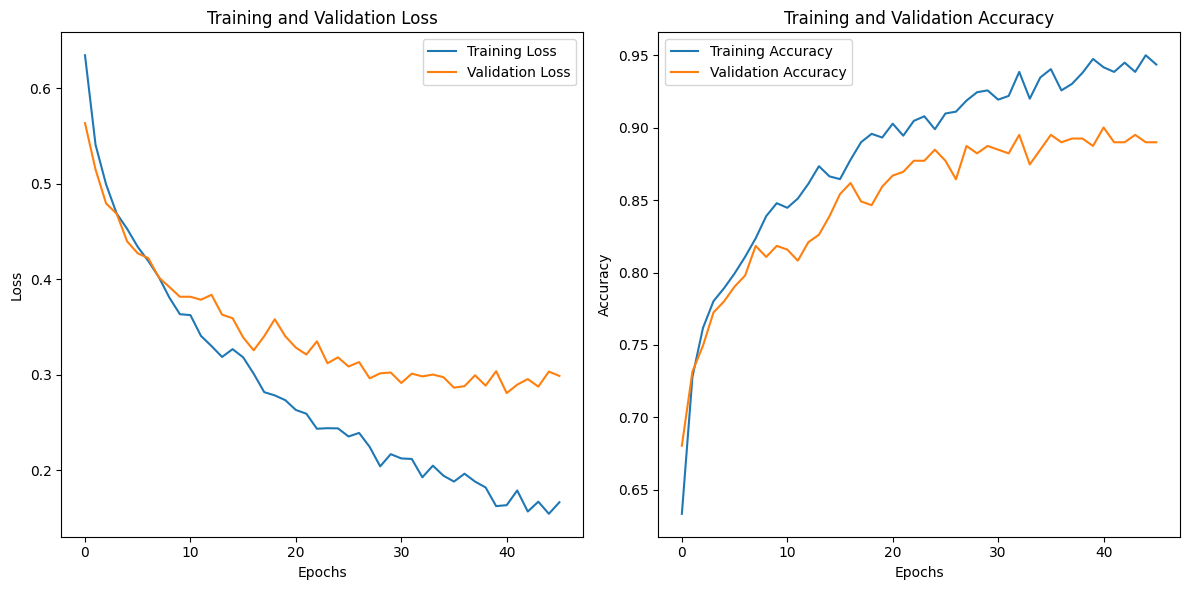

Fold 4 - Validation Loss: 0.28077733516693115, Validation Accuracy: 0.9002557396888733
Training fold 5...
Epoch 1/100
196/196 [==============================] - 1s 2ms/step - loss: 0.6535 - accuracy: 0.6243 - val_loss: 0.5949 - val_accuracy: 0.6854 - lr: 0.0010
Epoch 2/100
196/196 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.7297 - val_loss: 0.5426 - val_accuracy: 0.7494 - lr: 0.0010
Epoch 3/100
196/196 [==============================] - 1s 3ms/step - loss: 0.5150 - accuracy: 0.7540 - val_loss: 0.5173 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 4/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7700 - val_loss: 0.4838 - val_accuracy: 0.7954 - lr: 0.0010
Epoch 5/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7936 - val_loss: 0.4730 - val_accuracy: 0.8184 - lr: 0.0010
Epoch 6/100
196/196 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7936 - val_loss: 0

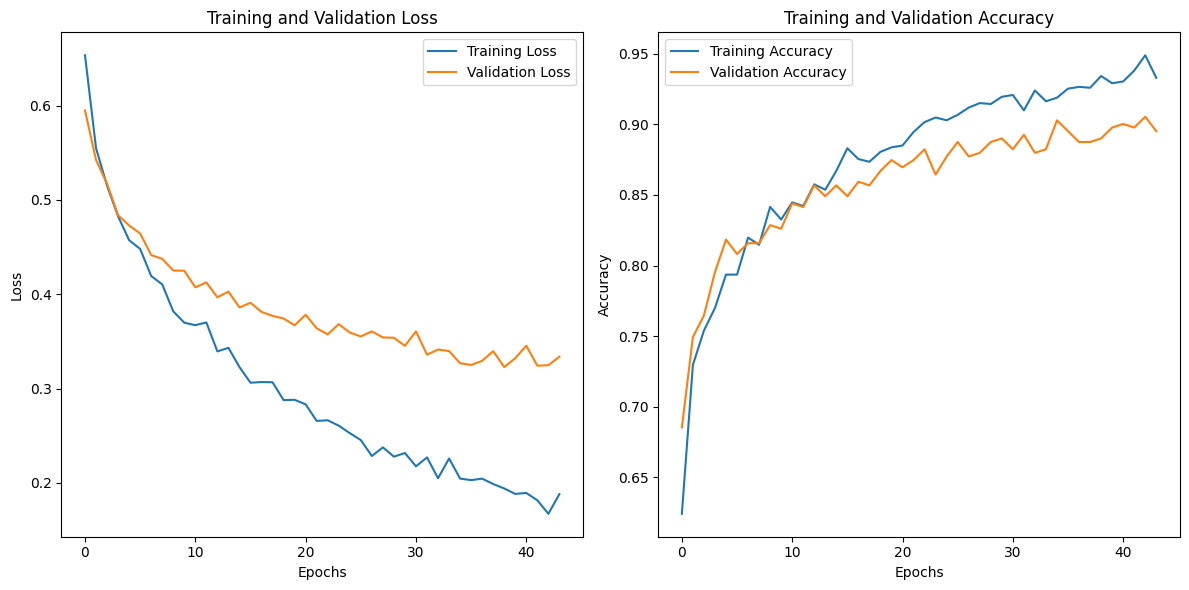

Fold 5 - Validation Loss: 0.3228282630443573, Validation Accuracy: 0.8900255560874939


In [54]:
EarlyStopping = tf.keras.callbacks.EarlyStopping
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
# Define the ANN model with additional neurons and adjusted dropout rate
def create_model():
    input_layer = Input(shape=(X_train_num_scaled.shape[1],))
    dense_layer_1 = Dense(30, activation='relu')(input_layer)
    dropout_layer_1 = Dropout(0.1)(dense_layer_1)
    dense_layer_2 = Dense(20, activation='relu')(dropout_layer_1)
    output = Dense(1, activation='sigmoid')(dense_layer_2)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Implement early stopping with reduced patience
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Implement learning rate reduction on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in kf.split(X_train_resampled):
    print(f"Training fold {fold_no}...")
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    model = create_model()
    history = model.fit(X_train_fold, y_train_fold, batch_size=8, epochs=100, verbose=1, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping, lr_scheduler])

    plot_training_history(history)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    fold_no += 1